In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from scipy.stats import kruskal
from scipy.stats import boxcox
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [50]:
df_final = pd.read_csv('data/df_final.csv')

In [51]:
df_final

,Area,PIB par habitant,Taux d'urbanisation,Taux de chômage,Taux d'inflation,Part des énergies renouvelables,Taux de mortalité infantile,Taux d'électrification,Production_Viande de Volailles,Importations - Quantité_Viande de Volailles,...,Disponibilité intérieure_Viande de Volailles,Résidus_Viande de Volailles,Nourriture_Viande de Volailles,Disponibilité alimentaire en quantité (kg/personne/an)_Viande de Volailles,Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles,Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles,Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles,Exportations - Quantité_Viande de Volailles,Internet,total_population
0,albania,4531.032207,59.383,13.616,1.986661,36.9,8.3,99.9,13.0,38.0,...,47.0,0.0,47.0,16.36,85.0,6.26,6.45,0.0,62.400000,1.438171e+06
1,algeria,4615.868744,72.052,12.000,5.591116,0.1,21.0,99.5,275.0,2.0,...,277.0,0.0,264.0,6.38,22.0,1.97,1.50,0.0,47.691055,2.058897e+07
2,angola,2439.374439,64.839,16.617,29.844480,52.5,53.4,42.9,42.0,277.0,...,319.0,0.0,315.0,10.56,35.0,3.60,2.22,0.0,26.000000,1.511922e+07
3,armenia,4041.995071,63.103,12.968,0.969553,12.6,11.7,99.7,11.0,35.0,...,47.0,0.0,47.0,16.06,54.0,5.44,3.39,0.0,64.744884,1.427434e+06
4,australia,53954.553495,85.904,5.592,1.948647,9.9,3.2,100.0,1269.0,16.0,...,1171.0,0.0,1171.0,47.65,192.0,16.60,13.45,42.0,86.545049,1.230859e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,united kingdom,40572.121482,83.143,4.330,2.557756,8.8,3.8,100.0,1814.0,779.0,...,2234.0,0.0,2131.0,31.94,120.0,13.77,6.74,359.0,90.424550,3.306279e+07
99,united states,60322.261424,82.058,4.355,2.130110,9.7,5.6,100.0,21914.0,123.0,...,18266.0,0.0,18100.0,55.68,219.0,19.93,14.83,3692.0,87.274889,1.627236e+08
100,uruguay,18995.397020,95.240,7.890,6.218094,60.8,6.8,99.8,33.0,3.0,...,33.0,0.0,31.0,9.12,33.0,2.97,2.23,3.0,70.322354,1.712818e+06
101,vietnam,2992.071532,35.213,1.874,3.520257,28.3,17.2,100.0,918.0,291.0,...,1206.0,0.0,1166.0,12.33,48.0,4.01,3.40,1.0,58.140000,4.706382e+07


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">4 - Analyse des données</h2>
</div>

In [52]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 21 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Area                                                                               103 non-null    object 
 1   PIB par habitant                                                                   103 non-null    float64
 2   Taux d'urbanisation                                                                103 non-null    float64
 3   Taux de chômage                                                                    103 non-null    float64
 4   Taux d'inflation                                                                   103 non-null    float64
 5   Part des énergies renouvelables                                                    103 non-null    float64

In [53]:
df_final.describe()

,PIB par habitant,Taux d'urbanisation,Taux de chômage,Taux d'inflation,Part des énergies renouvelables,Taux de mortalité infantile,Taux d'électrification,Production_Viande de Volailles,Importations - Quantité_Viande de Volailles,Variation de stock_Viande de Volailles,Disponibilité intérieure_Viande de Volailles,Résidus_Viande de Volailles,Nourriture_Viande de Volailles,Disponibilité alimentaire en quantité (kg/personne/an)_Viande de Volailles,Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles,Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles,Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles,Exportations - Quantité_Viande de Volailles,Internet,total_population
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,1.030000e+02
mean,17878.531236,64.609723,7.588961,3.833840,30.096602,17.673786,88.922330,1019.766990,112.611650,21.252427,947.883495,-3.213592,916.087379,22.157476,80.902913,7.913301,5.228058,163.184466,60.185838,2.834377e+07
std,21712.551388,20.103722,5.325587,4.707728,25.162291,18.926400,21.451459,3124.475279,197.387805,94.695147,2726.170838,11.979272,2667.652479,14.050759,52.757402,5.041189,3.614599,581.592940,25.859711,9.674878e+07
min,484.456129,16.350000,0.564000,-0.981890,0.000000,1.900000,17.600000,0.000000,0.000000,-119.000000,7.000000,-78.000000,7.000000,0.670000,2.000000,0.230000,0.100000,0.000000,5.900000,1.039127e+05
25%,3696.882811,54.104500,3.928000,1.351688,10.650000,3.800000,92.250000,37.500000,3.000000,0.000000,60.500000,0.000000,59.500000,12.330000,42.000000,4.155000,2.545000,0.000000,38.450000,2.168870e+06
50%,6734.475153,66.041000,5.648000,2.130110,24.100000,9.500000,99.900000,136.000000,24.000000,1.000000,173.000000,0.000000,162.000000,20.430000,71.000000,7.380000,4.580000,4.000000,63.747282,5.112583e+06
75%,25105.515660,80.898000,9.455000,4.349875,44.850000,22.700000,100.000000,737.000000,123.000000,12.500000,709.000000,0.000000,709.000000,30.125000,106.000000,10.515000,6.645000,54.000000,80.877550,1.941787e+07
max,110193.213797,100.000000,24.830000,29.844480,93.600000,87.400000,100.000000,21914.000000,1069.000000,859.000000,18266.000000,0.000000,18100.000000,67.390000,234.000000,27.870000,15.340000,4223.000000,98.255201,6.988180e+08


In [54]:
# Création des boxplots interactifs pour chaque colonne
for col in df_final.columns:
    if col == 'Area':  # On évite de faire un boxplot pour la colonne Area
        continue
    
    # Création du boxplot interactif avec les informations sur les outliers
    fig = px.box(df_final, y=col, hover_data=['Area'], title=f"Boxplot interactif de {col}")

    # Affichage du graphique interactif
    fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2 - Correlation entre les données</h3>
</div>

In [55]:
df_valeurs = df_final.select_dtypes(include=['float64', 'int64'])

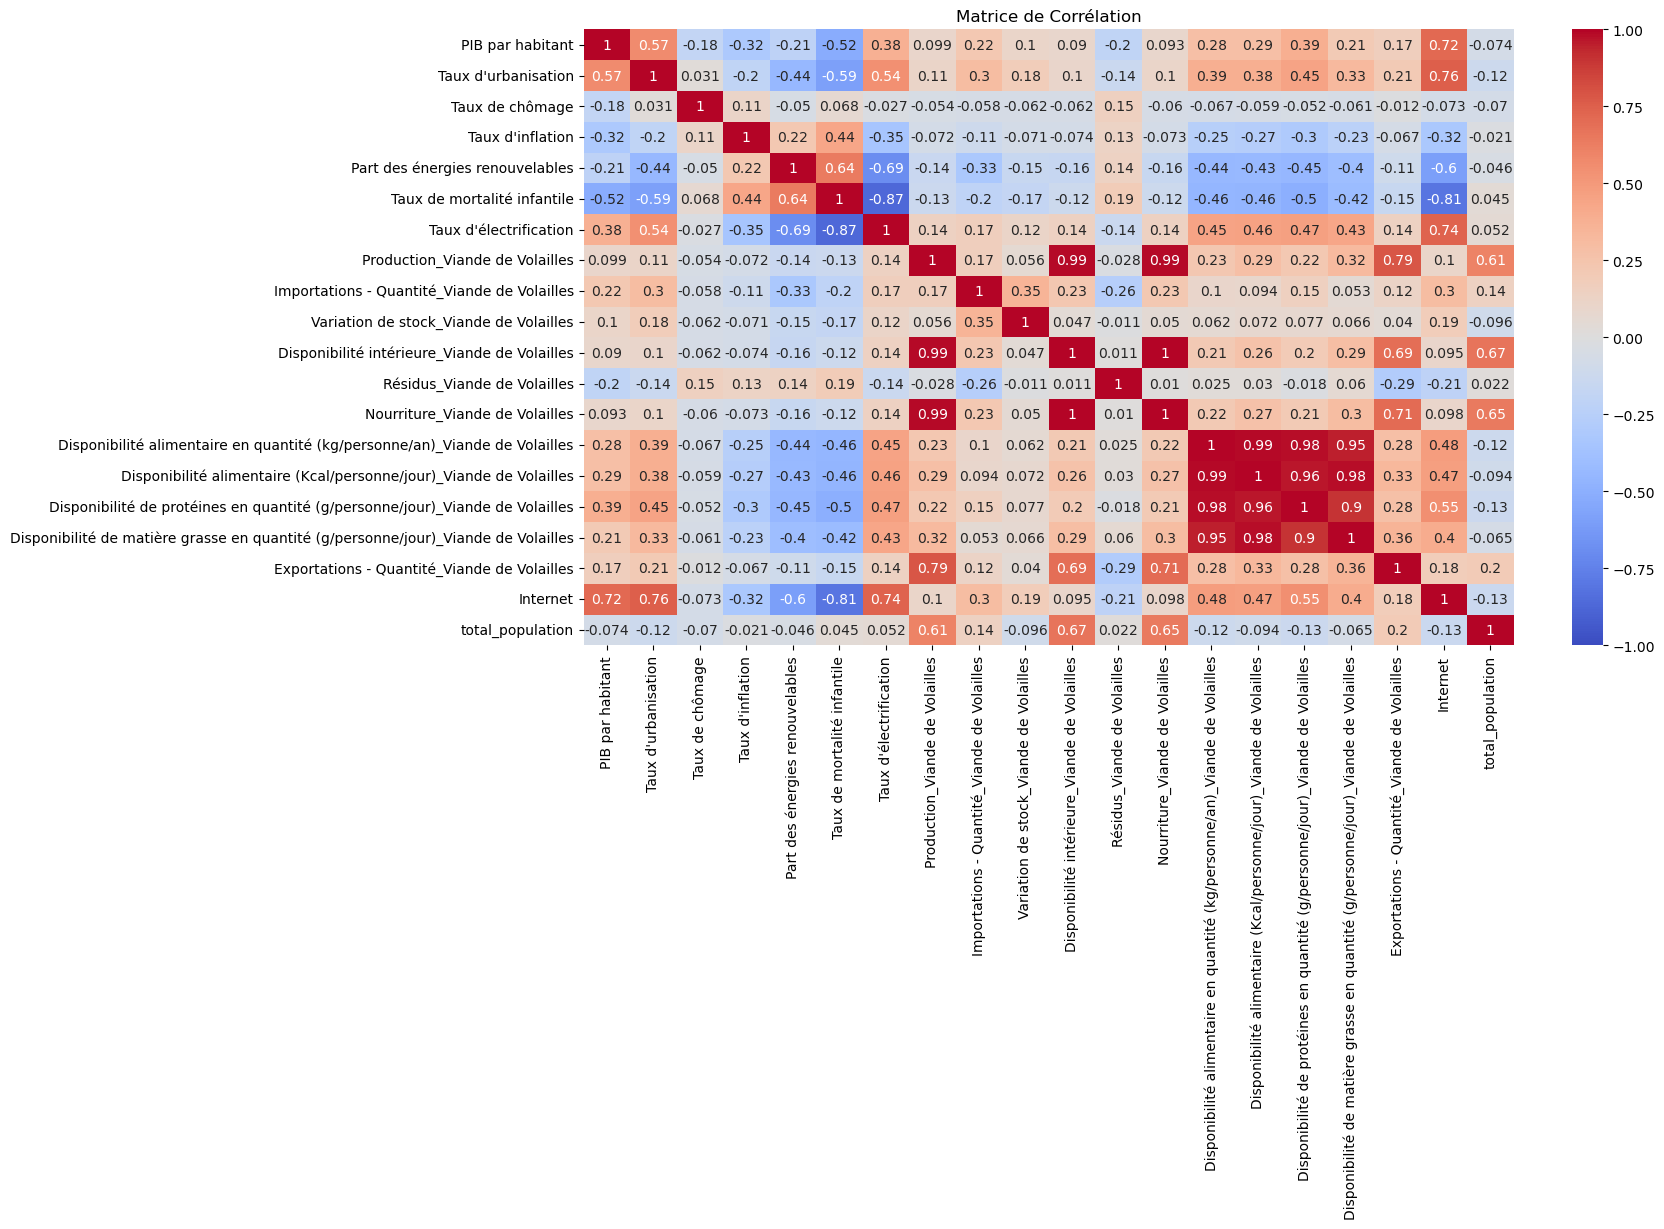

In [56]:
correlation_matrix = df_valeurs.corr(method='pearson')
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1 - Standardisation des données</h3>
</div>

In [57]:
# Séparer les colonnes numériques et non numériques
df_pays = df_final.select_dtypes(exclude=['float64', 'int64']).columns
df_valeurs = df_final.select_dtypes(include=['float64', 'int64']).columns

# Appliquer StandardScaler sur les colonnes numériques
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_final[df_valeurs])

# Convertir les données standardisées en DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_valeurs)

# Concaténer les colonnes non numériques avec les colonnes standardisées
df_final_scaled = pd.concat([scaled_df, df_final[df_pays].reset_index(drop=True)], axis=1)

# Résultat : df_final_scaled contient les colonnes numériques standardisées et les colonnes non numériques inchangées
df_final_scaled.head()

,PIB par habitant,Taux d'urbanisation,Taux de chômage,Taux d'inflation,Part des énergies renouvelables,Taux de mortalité infantile,Taux d'électrification,Production_Viande de Volailles,Importations - Quantité_Viande de Volailles,Variation de stock_Viande de Volailles,...,Résidus_Viande de Volailles,Nourriture_Viande de Volailles,Disponibilité alimentaire en quantité (kg/personne/an)_Viande de Volailles,Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles,Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles,Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles,Exportations - Quantité_Viande de Volailles,Internet,total_population,Area
0,-0.617743,-0.261259,1.137248,-0.394290,0.271703,-0.497698,0.514247,-0.323795,-0.379844,-0.183080,...,0.269575,-0.327380,-0.414627,0.078039,-0.329562,0.339710,-0.281954,0.086041,-0.279457,albania
1,-0.613816,0.372004,0.832323,0.375100,-1.197955,0.176604,0.495509,-0.239531,-0.563118,-0.225527,...,0.269575,-0.245638,-1.128382,-1.121946,-1.184713,-1.036433,-0.281954,-0.485538,-0.080546,algeria
2,-0.714548,0.011460,1.703509,5.552112,0.894710,1.896870,-2.155908,-0.314468,0.836892,-0.225527,...,0.269575,-0.226426,-0.829435,-0.874330,-0.859796,-0.836266,-0.281954,-1.328437,-0.137358,angola
3,-0.640376,-0.075314,1.014976,-0.611397,-0.698750,-0.317176,0.504878,-0.324438,-0.395116,-0.246751,...,0.269575,-0.327380,-0.436083,-0.512430,-0.493018,-0.510996,-0.281954,0.177161,-0.279569,armenia
4,1.669653,1.064400,-0.376808,-0.402404,-0.806579,-0.768480,0.518932,0.080158,-0.491844,0.527913,...,0.269575,0.096024,1.823188,2.116108,1.731571,2.285772,-0.209385,1.024300,-0.166551,australia


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.2 - Transformation des données</h3>
</div>

Colonnes disponibles : Index(['PIB par habitant', 'Taux d'urbanisation', 'Taux de chômage',
       'Taux d'inflation', 'Part des énergies renouvelables',
       'Taux de mortalité infantile', 'Taux d'électrification',
       'Production_Viande de Volailles',
       'Importations - Quantité_Viande de Volailles',
       'Variation de stock_Viande de Volailles',
       'Disponibilité intérieure_Viande de Volailles',
       'Résidus_Viande de Volailles', 'Nourriture_Viande de Volailles',
       'Disponibilité alimentaire en quantité (kg/personne/an)_Viande de Volailles',
       'Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles',
       'Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles',
       'Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles',
       'Exportations - Quantité_Viande de Volailles', 'Internet',
       'total_population'],
      dtype='object')


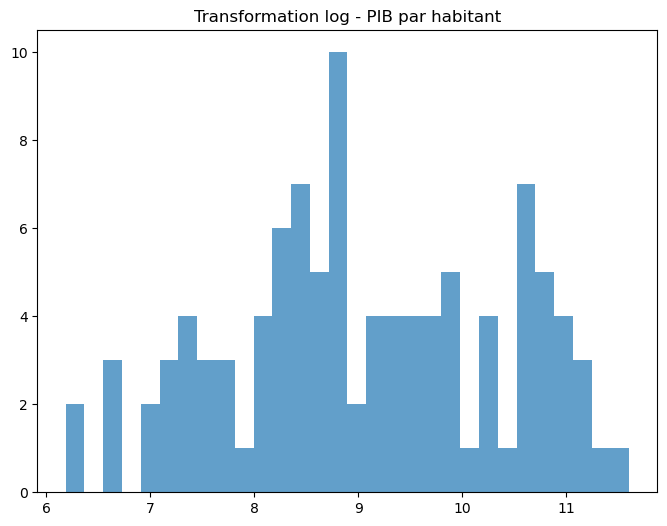

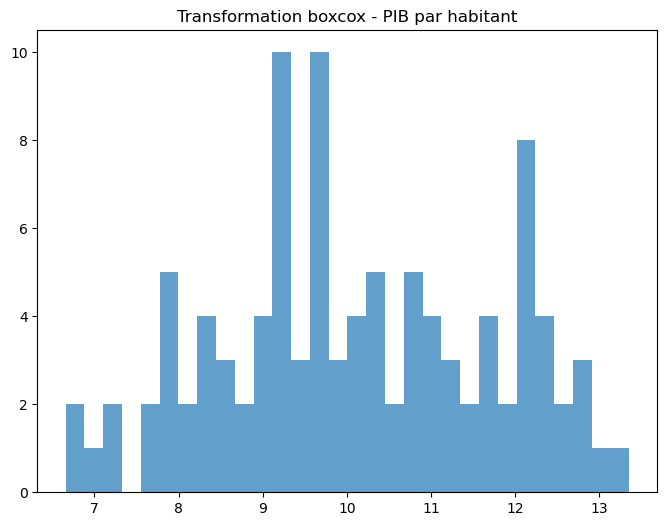

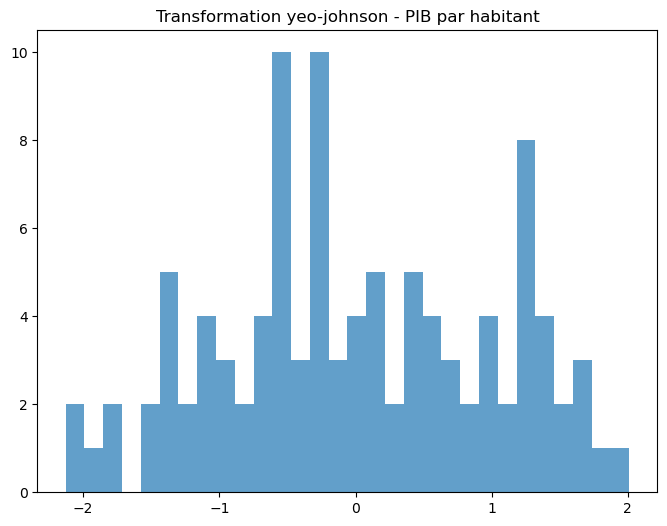

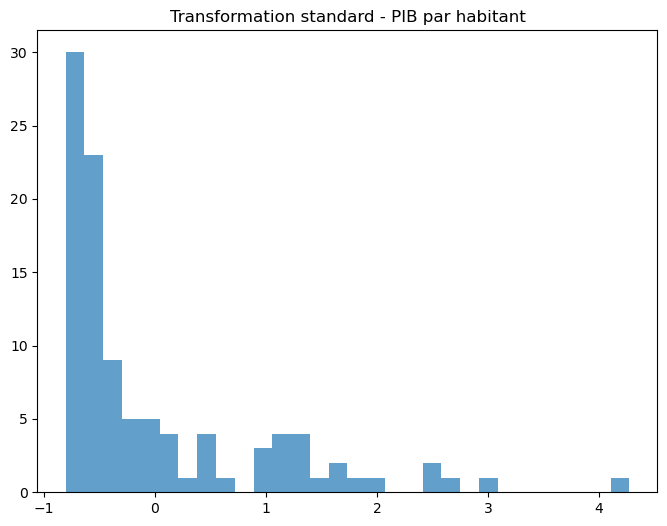

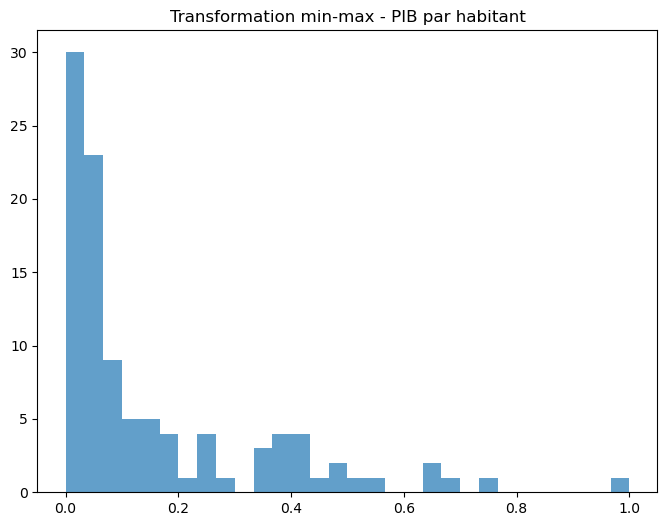

In [58]:
# Dictionnaire pour stocker les résultats
transformed_data = {}

# Sélectionner uniquement les colonnes numériques (float64, int64)
df_valeurs = df_final.select_dtypes(include=['float64', 'int64'])

# Transformation log
df_log = np.log(df_valeurs + 1)  # On applique log sur les valeurs, pas sur les noms de colonnes
transformed_data['log'] = df_log

# Box-Cox (gérer les valeurs négatives)
df_boxcox = df_valeurs.apply(lambda x: boxcox(x + 1)[0] if np.all(x > 0) else x)
transformed_data['boxcox'] = df_boxcox

# Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')
df_yeo_johnson = pd.DataFrame(pt.fit_transform(df_valeurs), columns=df_valeurs.columns)
transformed_data['yeo-johnson'] = df_yeo_johnson

# StandardScaler
scaler = StandardScaler()
df_standard = pd.DataFrame(scaler.fit_transform(df_valeurs), columns=df_valeurs.columns)
transformed_data['standard'] = df_standard

# Min-Max Scaling
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(df_valeurs), columns=df_valeurs.columns)
transformed_data['min-max'] = df_minmax

# Vérifier les colonnes disponibles après transformation
print("Colonnes disponibles :", df_valeurs.columns)

# Visualiser les transformations
for key, data in transformed_data.items():
    plt.figure(figsize=(8, 6))
    # Utilise le bon nom de colonne, par exemple, la première colonne du DataFrame transformé
    colonne_a_visualiser = df_valeurs.columns[0]  # Remplace par une colonne valide
    plt.hist(data[colonne_a_visualiser], bins=30, alpha=0.7)
    plt.title(f'Transformation {key} - {colonne_a_visualiser}')
    plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.3 - Standardisation des données</h3>
</div>

In [59]:
# Appliquer StandardScaler sur les colonnes numériques
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_yeo_johnson)

# Convertir les données standardisées en DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_yeo_johnson.columns)

# Concaténer les colonnes non numériques avec les colonnes standardisées
df_final_scaled = pd.concat([scaled_df, df_final[df_pays].reset_index(drop=True)], axis=1)

# Résultat : df_final_scaled contient les colonnes numériques standardisées et les colonnes non numériques inchangées
df_final_scaled.head()

,PIB par habitant,Taux d'urbanisation,Taux de chômage,Taux d'inflation,Part des énergies renouvelables,Taux de mortalité infantile,Taux d'électrification,Production_Viande de Volailles,Importations - Quantité_Viande de Volailles,Variation de stock_Viande de Volailles,...,Résidus_Viande de Volailles,Nourriture_Viande de Volailles,Disponibilité alimentaire en quantité (kg/personne/an)_Viande de Volailles,Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles,Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles,Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles,Exportations - Quantité_Viande de Volailles,Internet,total_population,Area
0,-0.488236,-0.339639,1.206489,-0.239220,0.513726,-0.173040,0.628588,-1.158953,0.173008,-0.031342,...,0.412059,-0.829063,-0.267398,0.241888,-0.180330,0.515724,-1.123594,0.046435,-0.837388,albania
1,-0.474247,0.324030,1.012464,0.797695,-1.978128,0.713267,0.572518,0.296797,-1.093211,-0.095393,...,0.412059,0.244883,-1.238846,-1.213801,-1.338014,-1.147583,-1.123594,-0.531875,0.753730,algeria
2,-0.951634,-0.060567,1.512182,2.859049,0.968276,1.500194,-2.076785,-0.611080,1.224622,-0.095393,...,0.412059,0.347379,-0.779962,-0.825626,-0.830118,-0.809987,-1.123594,-1.326991,0.574924,angola
3,-0.574224,-0.150498,1.131600,-0.779149,-0.550141,0.164697,0.600436,-1.234210,0.131704,-0.137732,...,0.412059,-0.829063,-0.291531,-0.365737,-0.364312,-0.359291,-1.123594,0.140972,-0.842032,armenia
4,1.435225,1.109237,-0.146788,-0.255888,-0.733134,-1.131817,0.642752,1.042283,-0.249745,0.678546,...,0.412059,1.066754,1.596630,1.769447,1.541250,1.831782,0.872063,1.046102,0.455000,australia


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.3 - PCA</h3>
</div>

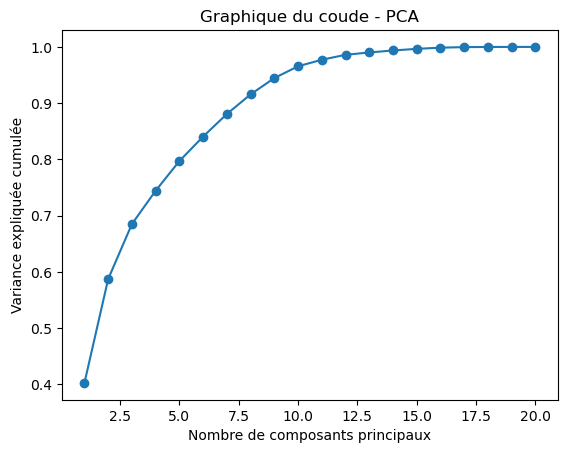

In [60]:
# Appliquer la PCA sur toutes les dimensions
pca = PCA().fit(scaled_data)

# Graphique du coude (variance expliquée par chaque composante)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Graphique du coude - PCA')
plt.xlabel('Nombre de composants principaux')
plt.ylabel('Variance expliquée cumulée')
plt.show()

In [61]:
# 2. Appliquer PCA
pca = PCA(n_components=4)  
pca_data = pca.fit_transform(scaled_data)

In [62]:
print(pca.explained_variance_ratio_)


[0.40278689 0.18468265 0.09769619 0.05927182]


In [63]:
print(pca.components_)


[[ 2.80849520e-01  2.48492060e-01  6.64697075e-04 -1.20268976e-01
  -2.31295691e-01 -2.70941352e-01  2.84180658e-01  1.95296373e-01
   1.82625303e-01  5.22673757e-02  2.02766048e-01 -1.19189789e-01
   2.00803056e-01  2.79920870e-01  2.81411074e-01  2.91644488e-01
   2.68788151e-01  2.55665886e-01  2.91430450e-01  4.72197261e-02]
 [-1.50296445e-01 -9.80732708e-02 -1.19988509e-01  7.90956573e-02
  -1.75925949e-06  1.11695235e-01 -6.77981184e-02  3.94922993e-01
   1.17572146e-01 -3.52162191e-02  4.03966212e-01 -1.53331938e-01
   4.07146050e-01 -1.66111847e-01 -1.59674759e-01 -1.69940044e-01
  -1.47269145e-01  1.78972700e-01 -1.43432144e-01  5.00310886e-01]
 [-2.84965483e-01 -2.04811109e-01 -3.41912263e-02  3.50795614e-02
   1.66673781e-02  3.33588451e-01 -1.81919404e-01  6.81191449e-02
  -1.03512266e-01 -2.77908374e-02  1.45502923e-01  2.44917917e-01
   1.39583950e-01  3.56763641e-01  3.59719537e-01  2.96380410e-01
   3.87706012e-01 -2.04583265e-01 -2.75820448e-01  1.61204016e-02]
 [-5.06

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.3 - Cercle de correlation PCA</h3>
</div>

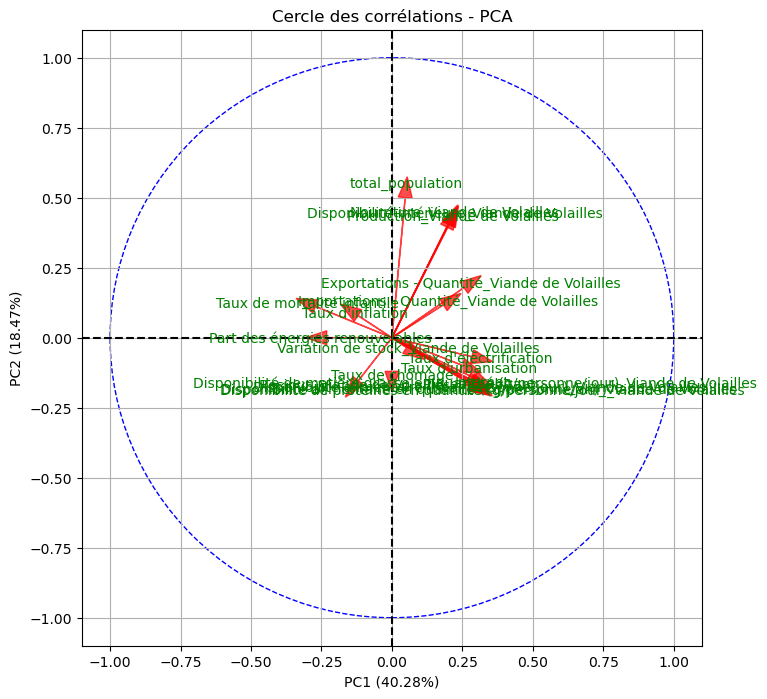

In [64]:
# 2. Récupérer les composantes et la variance expliquée
components = pca.components_
explained_variance = pca.explained_variance_ratio_

# 3. Tracer le cercle de corrélation
plt.figure(figsize=(8, 8))

# Tracer un cercle
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Tracer les flèches pour chaque variable
for i, (x, y) in enumerate(zip(components[0, :], components[1, :])):
    plt.arrow(0, 0, x, y, color='r', alpha=0.7, head_width=0.05)
    plt.text(x * 1.1, y * 1.1, df_valeurs.columns[i], color='g', ha='center', va='center')

# Ajouter les étiquettes et un titre
plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("Cercle des corrélations - PCA")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.grid(True)

# Afficher le graphique
plt.show()

In [65]:
# 1. Créer un DataFrame avec les composantes principales
components_df = pd.DataFrame(
    data=components.T,  # Transpose les composantes pour correspondre aux variables en colonnes
    index=df_valeurs.columns,  # Utilise les noms des colonnes comme index
    columns=[f"PC{i+1}" for i in range(components.shape[0])]  # Noms des composantes
)

# 2. Ajouter la variance expliquée pour chaque PC
variance_df = pd.DataFrame(
    data={'Explained Variance': explained_variance},
    index=[f"PC{i+1}" for i in range(len(explained_variance))]
)

# Afficher les DataFrames
print("Composantes principales:")
display(components_df)
print("\nVariance expliquée:")
display(variance_df)

Composantes principales:


,PC1,PC2,PC3,PC4
PIB par habitant,0.280850,-0.150296,-0.284965,-0.050687
Taux d'urbanisation,0.248492,-0.098073,-0.204811,0.142081
Taux de chômage,0.000665,-0.119989,-0.034191,0.716045
Taux d'inflation,-0.120269,0.079096,0.035080,0.524880
Part des énergies renouvelables,-0.231296,-0.000002,0.016667,-0.126722
Taux de mortalité infantile,-0.270941,0.111695,0.333588,0.065010
Taux d'électrification,0.284181,-0.067798,-0.181919,0.033031
Production_Viande de Volailles,0.195296,0.394923,0.068119,0.004204
Importations - Quantité_Viande de Volailles,0.182625,0.117572,-0.103512,0.132050
Variation de stock_Viande de Volailles,0.052267,-0.035216,-0.027791,0.214585



Variance expliquée:


,Explained Variance
PC1,0.402787
PC2,0.184683
PC3,0.097696
PC4,0.059272


In [97]:
top_pca = components_df.head(4).index.tolist()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.4 - CAH</h3>
</div>

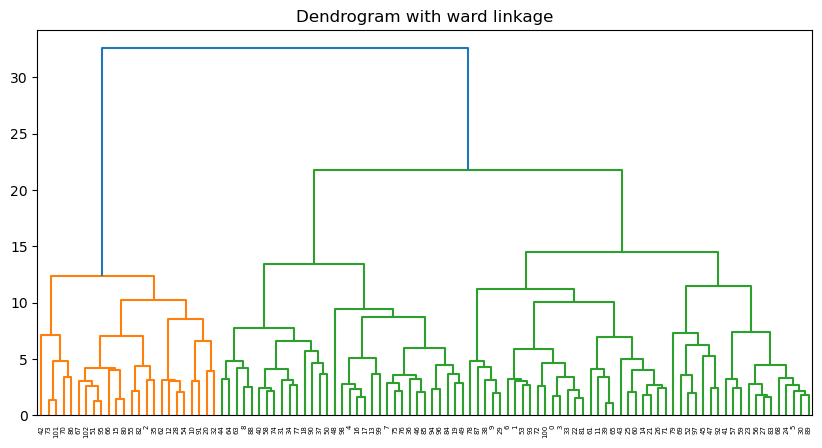

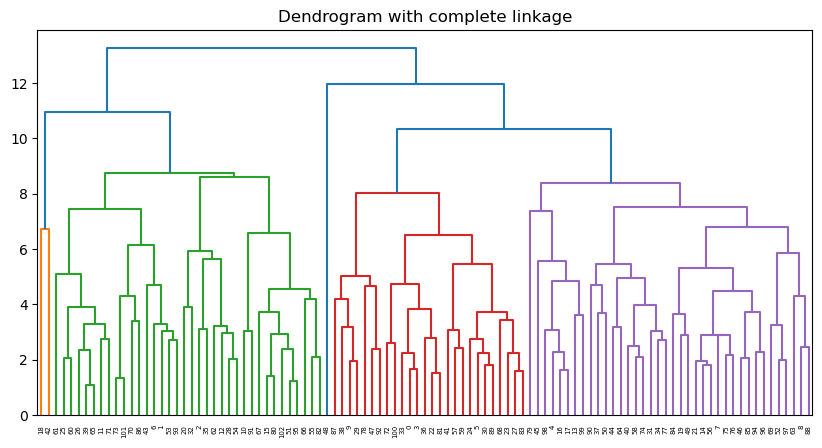

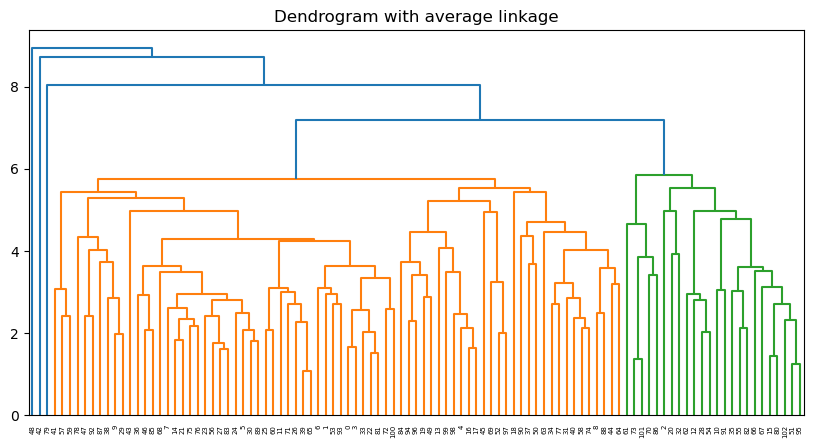

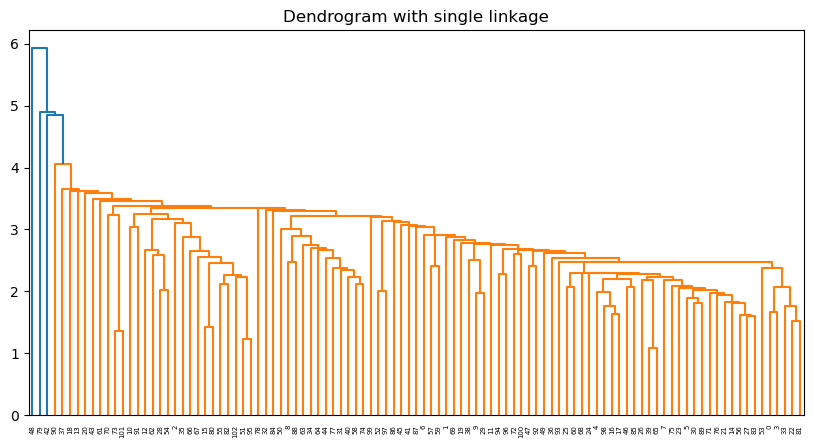

In [66]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Différentes méthodes à tester
methods = ['ward', 'complete', 'average', 'single']

for method in methods:
    plt.figure(figsize=(10, 5))
    dendrogram = sch.dendrogram(sch.linkage(scaled_data, method=method))
    plt.title(f'Dendrogram with {method} linkage')
    plt.show()

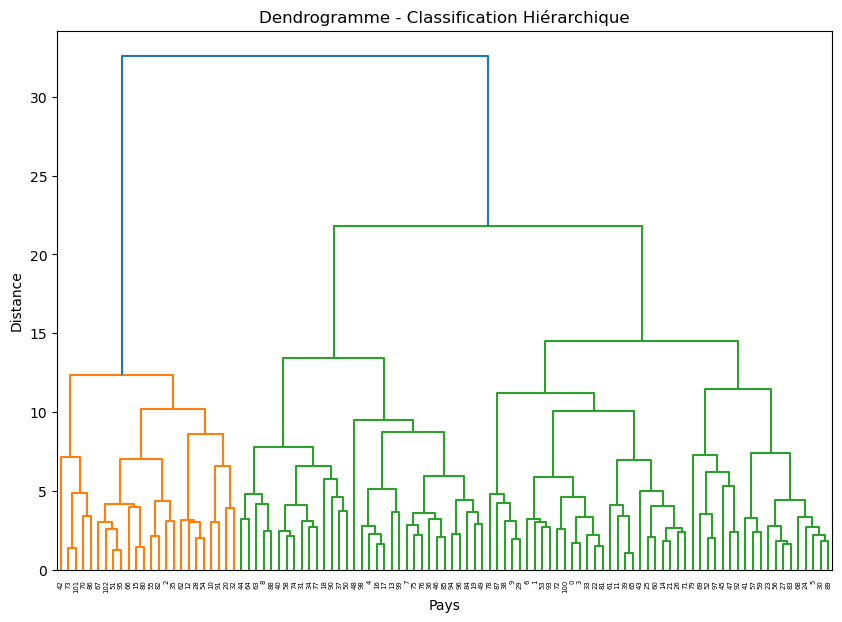

In [67]:
# Créer une matrice de distances à partir des données standardisées
distance_matrix = sch.linkage(scaled_data, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(distance_matrix)
plt.title('Dendrogramme - Classification Hiérarchique')
plt.xlabel('Pays')
plt.ylabel('Distance')
plt.show()

In [68]:
from scipy.cluster.hierarchy import fcluster

df_final_scaled['cluster_cah'] = fcluster(distance_matrix, t=4, criterion='maxclust')  

# Visualiser les clusters obtenus
print(df_final_scaled[['Area', 'cluster_cah']])

               Area  cluster_cah
0           albania            3
1           algeria            3
2            angola            1
3           armenia            3
4         australia            2
..              ...          ...
98   united kingdom            2
99    united states            2
100         uruguay            3
101         vietnam            1
102          zambia            1

[103 rows x 2 columns]


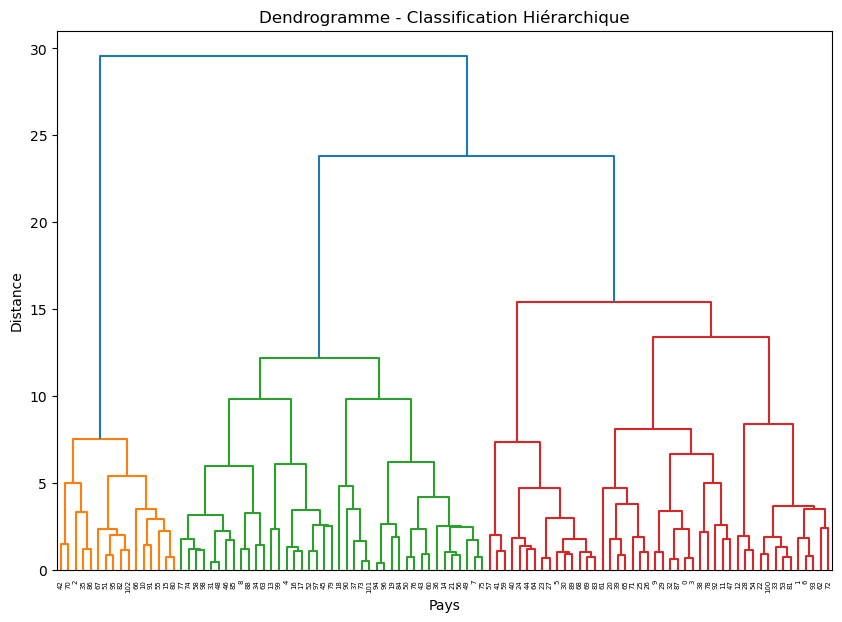

In [69]:
# Créer une matrice de distances à partir des données standardisées
distance_matrix_pca = sch.linkage(pca_data, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(distance_matrix_pca)
plt.title('Dendrogramme - Classification Hiérarchique')
plt.xlabel('Pays')
plt.ylabel('Distance')
plt.show()

In [70]:
df_final_scaled['pca_cah'] = fcluster(distance_matrix_pca, t=4, criterion='maxclust')  

# Visualiser les clusters obtenus
print(df_final_scaled[['Area', 'pca_cah']])

               Area  pca_cah
0           albania        4
1           algeria        4
2            angola        1
3           armenia        4
4         australia        2
..              ...      ...
98   united kingdom        2
99    united states        2
100         uruguay        4
101         vietnam        2
102          zambia        1

[103 rows x 2 columns]


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.4 - K means</h3>
</div>

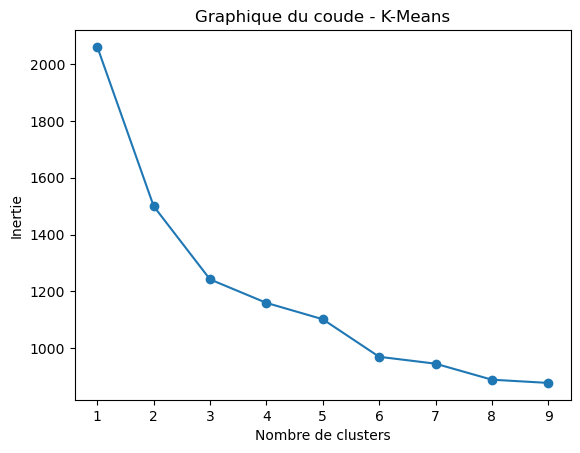

In [71]:
# Calculer l'inertie pour plusieurs valeurs de k (nombre de clusters)
inertias = []
K_range = range(1, 10)  # On teste pour 1 à 10 clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

# Graphique du coude (Inertie vs nombre de clusters)
plt.plot(K_range, inertias, marker='o')
plt.title('Graphique du coude - K-Means')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()


In [72]:
# 3. Appliquer K-Means sur les données réduites
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans = KMeans(n_clusters=4)
df_final_scaled['cluster_kmeans_pca'] = kmeans.fit_predict(scaled_data)

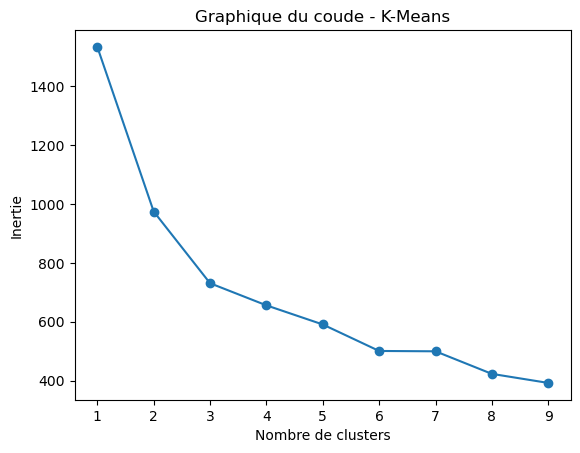

In [73]:
# Calculer l'inertie pour plusieurs valeurs de k (nombre de clusters)
inertias = []
K_range = range(1, 10)  # On teste pour 1 à 10 clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_data)
    inertias.append(kmeans.inertia_)

# Graphique du coude (Inertie vs nombre de clusters)
plt.plot(K_range, inertias, marker='o')
plt.title('Graphique du coude - K-Means')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

In [74]:
# 3. Appliquer K-Means sur les données réduites
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans = KMeans(n_clusters=4)
df_final_scaled['cluster_kmeans'] = kmeans.fit_predict(scaled_data)

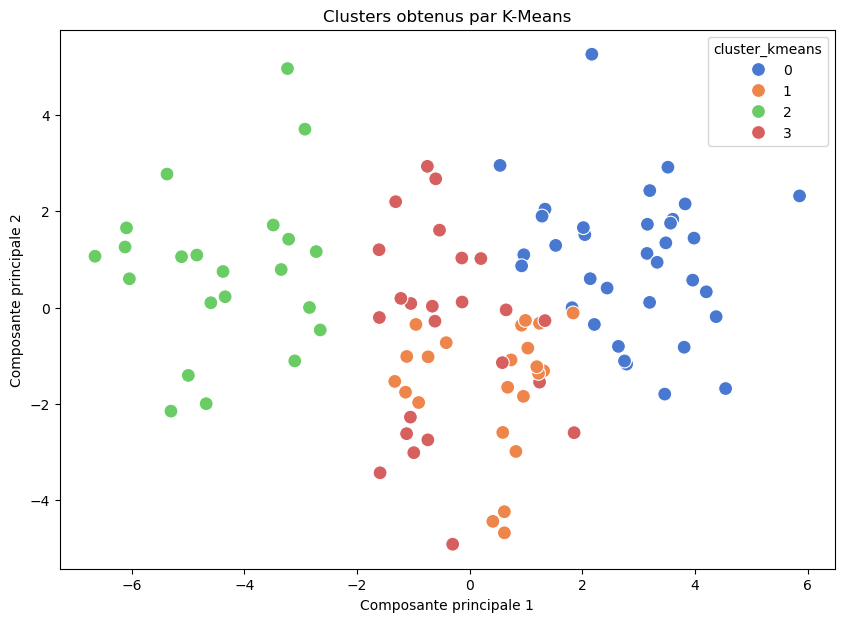

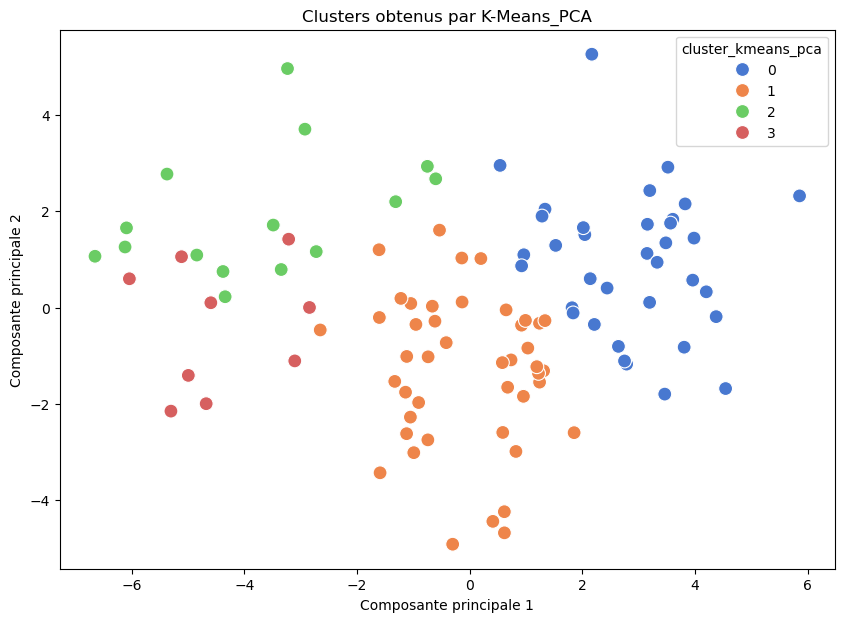

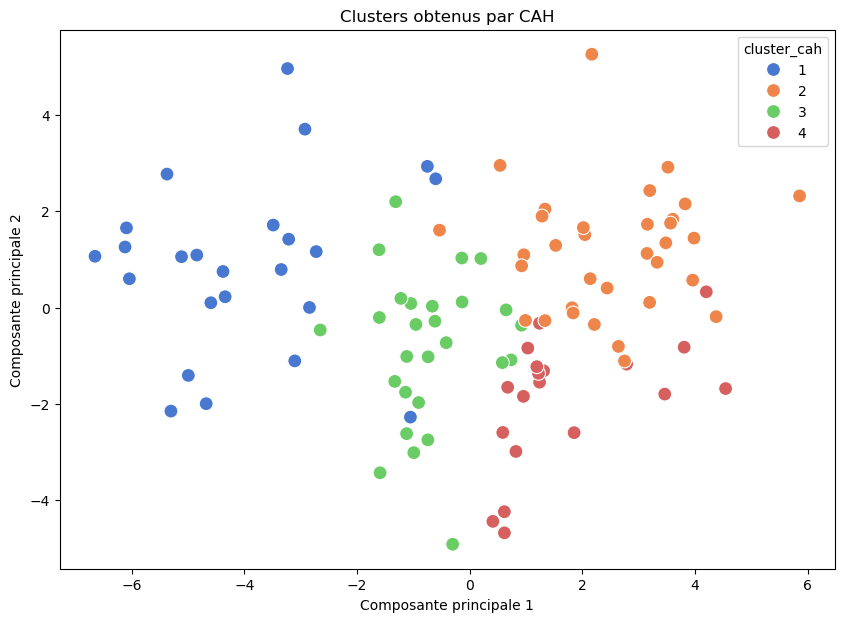

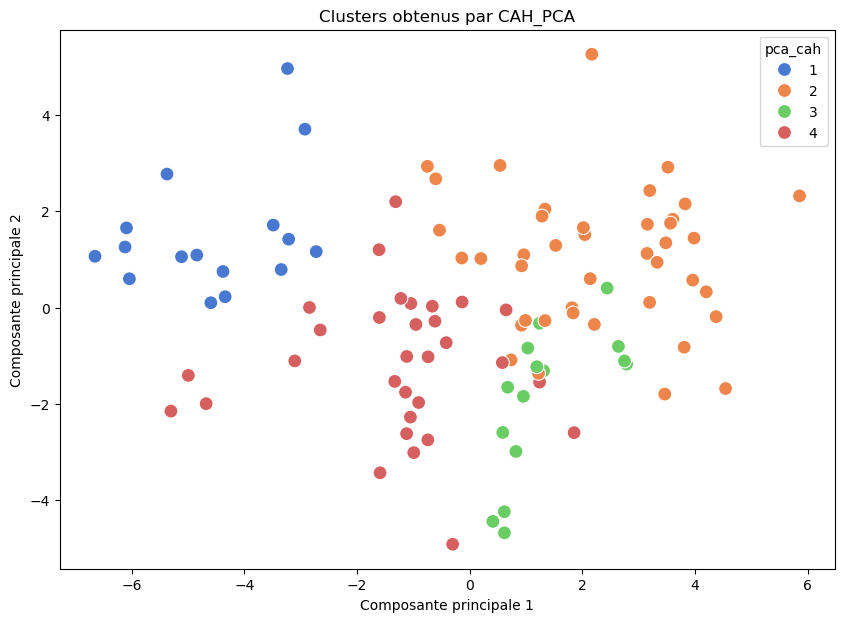

In [75]:
# Visualiser les clusters K-Means sur les deux premières composantes principales
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df_final_scaled['cluster_kmeans'], palette='muted', s=100)
plt.title('Clusters obtenus par K-Means')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()


# Visualiser les clusters K-Means sur les deux premières composantes principales
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df_final_scaled['cluster_kmeans_pca'], palette='muted', s=100)
plt.title('Clusters obtenus par K-Means_PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()

# Visualiser les clusters CAH
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df_final_scaled['cluster_cah'], palette='muted', s=100)
plt.title('Clusters obtenus par CAH')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()

# Visualiser les clusters CAH
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df_final_scaled['pca_cah'], palette='muted', s=100)
plt.title('Clusters obtenus par CAH_PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">5 - Resultats</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.1 - K means</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.1.1 - Analyse des variablies k means</h4>
</div>

In [76]:
# Sélectionner les colonnes numériques
numeric_columns = df_final_scaled.select_dtypes(include=[np.number]).columns

# Grouper les données par les clusters formés par K-Means (ou CAH)
grouped_kmeans = df_final_scaled.groupby('cluster_kmeans')

# Calculer les statistiques descriptives (moyenne, écart-type, etc.) pour chaque cluster
cluster_means = grouped_kmeans[numeric_columns].mean()

# Grouper les données par les clusters formés par K-Means (ou CAH)
grouped_kmeans_pca = df_final_scaled.groupby('cluster_kmeans_pca')

# Calculer les statistiques descriptives (moyenne, écart-type, etc.) pour chaque cluster
cluster_means_pca = grouped_kmeans_pca[numeric_columns].mean()# Grouper les données par les clusters formés par K-Means (ou CAH)

# Afficher les moyennes de chaque caractéristique pour chaque cluster
print("Moyenne des caractéristiques par 'cluster_kmeans':")
display(cluster_means)

# Afficher les moyennes de chaque caractéristique pour chaque cluster
print("Moyenne des caractéristiques par 'cluster_kmeans_pca':")
display(cluster_means_pca)

# Calculer la médiane pour chaque cluster
cluster_median = grouped_kmeans[numeric_columns].median()
print("\nMédiane des caractéristiques par 'cluster_kmeans':")
display(cluster_median)

# Calculer la médiane pour chaque cluster
cluster_median_pca = grouped_kmeans_pca[numeric_columns].median()
print("\nMédiane des caractéristiques par 'cluster_kmeans_pca':")
display(cluster_median_pca)


Moyenne des caractéristiques par 'cluster_kmeans':


,PIB par habitant,Taux d'urbanisation,Taux de chômage,Taux d'inflation,Part des énergies renouvelables,Taux de mortalité infantile,Taux d'électrification,Production_Viande de Volailles,Importations - Quantité_Viande de Volailles,Variation de stock_Viande de Volailles,...,Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles,Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles,Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles,Exportations - Quantité_Viande de Volailles,Internet,total_population,cluster_cah,pca_cah,cluster_kmeans_pca,cluster_kmeans
cluster_kmeans,,,,,,,,,,,,,,,,,,,,,
0,0.677434,0.635968,-0.102583,-0.209094,-0.644120,-0.672451,0.581719,0.913733,0.678168,0.175179,...,0.653414,0.704266,0.611042,1.082826,0.723155,0.604070,2.294118,2.117647,0.000000,0.0
1,0.677397,0.491552,0.281216,-0.260009,0.056024,-0.856413,0.624732,-0.639412,-0.058721,0.044838,...,-0.095756,-0.020560,-0.139566,-0.006577,0.728998,-0.767690,3.434783,3.086957,0.956522,1.0
2,-1.220462,-1.082061,-0.092578,0.480823,1.117844,1.295308,-1.592875,-0.610545,-0.631373,-0.313003,...,-1.353255,-1.334007,-1.347626,-0.851521,-1.351717,0.250755,1.090909,1.818182,2.363636,2.0
3,-0.490112,-0.380135,-0.039309,0.104638,-0.165876,0.586003,0.037331,-0.122020,-0.325705,-0.004221,...,0.406580,0.244832,0.503432,-0.747139,-0.484018,-0.349921,2.750000,3.500000,1.125000,3.0


Moyenne des caractéristiques par 'cluster_kmeans_pca':


,PIB par habitant,Taux d'urbanisation,Taux de chômage,Taux d'inflation,Part des énergies renouvelables,Taux de mortalité infantile,Taux d'électrification,Production_Viande de Volailles,Importations - Quantité_Viande de Volailles,Variation de stock_Viande de Volailles,...,Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles,Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles,Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles,Exportations - Quantité_Viande de Volailles,Internet,total_population,cluster_cah,pca_cah,cluster_kmeans_pca,cluster_kmeans
cluster_kmeans_pca,,,,,,,,,,,,,,,,,,,,,
0,0.699016,0.651582,-0.096002,-0.212426,-0.598578,-0.694746,0.583463,0.888324,0.675400,0.178401,...,0.628562,0.683994,0.583318,1.070792,0.740280,0.584692,2.285714,2.114286,0.0,0.028571
1,0.116831,0.108389,0.234403,-0.086118,-0.091510,-0.139497,0.373167,-0.484981,-0.283921,0.020109,...,0.154789,0.108016,0.183334,-0.379661,0.139018,-0.676021,3.204545,3.386364,1.0,1.977273
2,-1.282830,-1.308935,-1.044711,0.132416,0.998765,1.157015,-1.262609,0.078242,-0.691222,-0.430492,...,-1.287061,-1.282688,-1.260962,-0.846454,-1.338002,0.849601,1.133333,1.333333,2.0,2.200000
3,-1.151516,-0.882275,0.968557,1.026431,1.110578,1.455413,-1.989046,-1.213976,-0.086460,-0.074605,...,-1.056055,-1.050240,-1.063156,-0.897311,-1.328505,-0.384811,1.000000,2.666667,3.0,2.000000



Médiane des caractéristiques par 'cluster_kmeans':


,PIB par habitant,Taux d'urbanisation,Taux de chômage,Taux d'inflation,Part des énergies renouvelables,Taux de mortalité infantile,Taux d'électrification,Production_Viande de Volailles,Importations - Quantité_Viande de Volailles,Variation de stock_Viande de Volailles,...,Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles,Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles,Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles,Exportations - Quantité_Viande de Volailles,Internet,total_population,cluster_cah,pca_cah,cluster_kmeans_pca,cluster_kmeans
cluster_kmeans,,,,,,,,,,,,,,,,,,,,,
0,0.813683,0.774761,-0.198903,-0.250252,-0.683604,-0.801925,0.642752,1.050972,0.833135,-0.011345,...,0.593971,0.842154,0.469538,1.233696,0.813456,0.666105,2.0,2.0,0.0,0.0
1,0.610880,0.467794,0.205470,-0.341664,0.177850,-1.014552,0.642752,-0.409329,-0.119825,-0.031342,...,-0.075020,0.031378,-0.234419,0.035557,0.723007,-0.614534,4.0,3.0,1.0,1.0
2,-1.295600,-1.027723,-0.614046,0.632997,1.219765,1.418617,-2.001788,-0.622707,-0.956934,-0.095393,...,-1.355750,-1.368511,-1.352445,-1.123594,-1.498138,0.312365,1.0,1.0,2.0,2.0
3,-0.517785,-0.439363,-0.181937,0.168375,-0.015683,0.533124,0.205442,0.051858,-0.235396,-0.069508,...,0.414034,0.130536,0.480585,-1.123594,-0.507755,-0.093402,3.0,4.0,1.0,3.0



Médiane des caractéristiques par 'cluster_kmeans_pca':


,PIB par habitant,Taux d'urbanisation,Taux de chômage,Taux d'inflation,Part des énergies renouvelables,Taux de mortalité infantile,Taux d'électrification,Production_Viande de Volailles,Importations - Quantité_Viande de Volailles,Variation de stock_Viande de Volailles,...,Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles,Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles,Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles,Exportations - Quantité_Viande de Volailles,Internet,total_population,cluster_cah,pca_cah,cluster_kmeans_pca,cluster_kmeans
cluster_kmeans_pca,,,,,,,,,,,,,,,,,,,,,
0,0.920091,0.777614,-0.146788,-0.252614,-0.648571,-0.835981,0.642752,1.042283,0.825186,0.023352,...,0.578042,0.808637,0.449947,1.222305,0.836128,0.646836,2.0,2.0,0.0,0.0
1,-0.241841,0.058151,0.152827,-0.257331,-0.015683,0.184931,0.628588,-0.256160,-0.221046,-0.061383,...,0.188275,0.044495,0.140373,-0.619220,0.136022,-0.526485,3.0,4.0,1.0,1.5
2,-1.278359,-1.387654,-0.809340,0.301934,0.785192,1.195524,-1.882187,-0.295883,-1.093211,-0.095393,...,-1.429276,-1.338014,-1.424297,-1.123594,-1.422952,0.739410,1.0,1.0,2.0,2.0
3,-1.312841,-0.840271,1.491186,0.918207,1.280648,1.485399,-2.086614,-1.234210,-0.280119,-0.095393,...,-1.054374,-1.089294,-1.042819,-1.123594,-1.326991,-0.522119,1.0,4.0,3.0,2.0


<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.1.2 - Corr k means</h4>
</div>

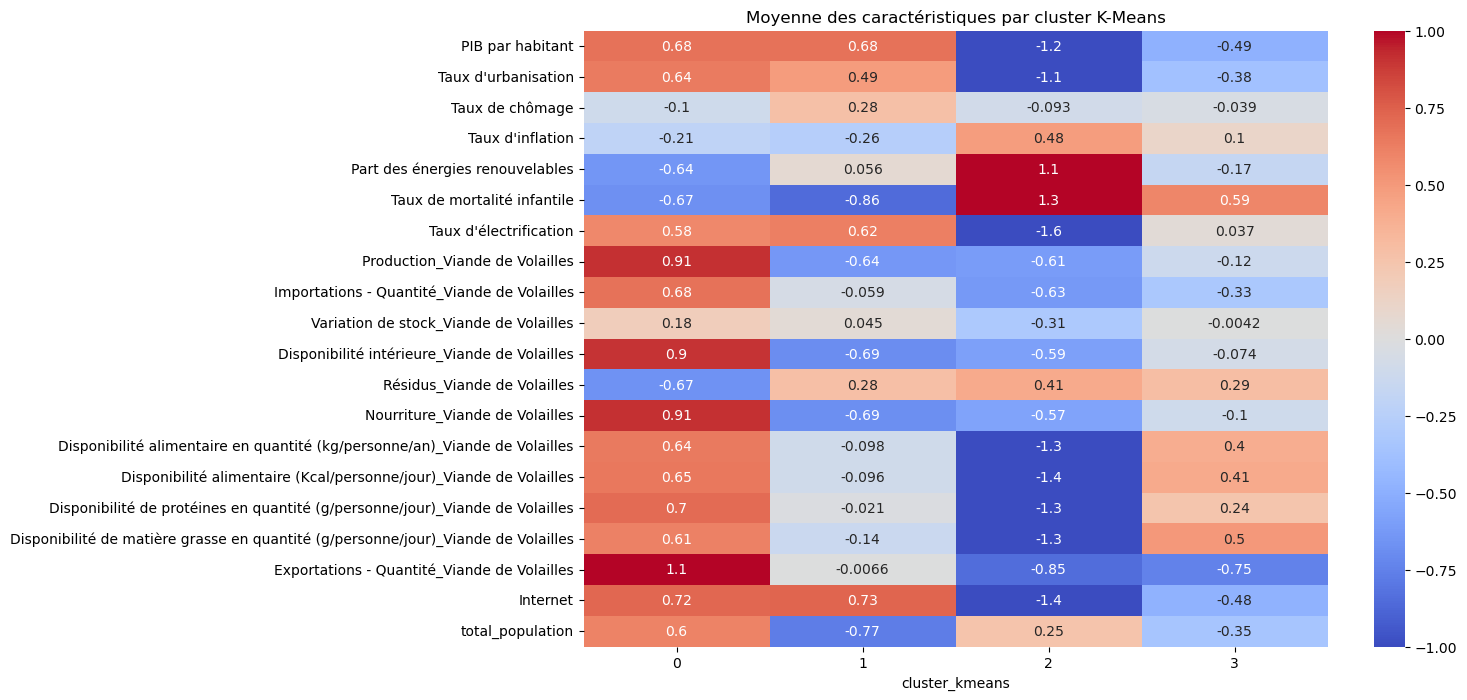

In [77]:
cluster_means_clean = cluster_means.drop(columns=['cluster_cah', 'cluster_kmeans','cluster_kmeans_pca','pca_cah'], errors='ignore')

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means_clean.T, annot=True, cmap="coolwarm", vmin= -1, vmax=1)
plt.title("Moyenne des caractéristiques par cluster K-Means")
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.1.3 - Test Kruskal</h4>
</div>

In [79]:
# Exclure les colonnes 'cluster_cah' et 'cluster_kmeans' des colonnes numériques
filtered_columns = [col for col in numeric_columns if col not in ['cluster_cah', 'cluster_kmeans','cluster_kmeans_pca','pca_cah']]

In [80]:
# Test de Kruskal-Wallis pour chaque variable numérique par cluster
kruskal_results = {}
for col in filtered_columns:
    # Groupes de données pour chaque cluster
    groups = [df_final_scaled[df_final_scaled['cluster_kmeans'] == cluster][col] for cluster in df_final_scaled['cluster_kmeans'].unique()]
    
    # Effectuer le test Kruskal-Wallis
    stat, p_value = kruskal(*groups)
    kruskal_results[col] = p_value

# Extraire et trier les p-values
sorted_p_values = sorted(kruskal_results.items(), key=lambda item: item[1])

# Afficher les 10 variables avec les p-values les plus faibles
print("Les 10 variables avec les p-values les plus faibles pour Kmeans :")
for feature, p_value in sorted_p_values[:10]:
    print(f"{feature}: p-value = {p_value}")


Les 10 variables avec les p-values les plus faibles pour Kmeans :
Taux de mortalité infantile: p-value = 2.579029672094876e-16
Internet: p-value = 2.2950565891117194e-15
Taux d'électrification: p-value = 7.211143582539787e-15
Exportations - Quantité_Viande de Volailles: p-value = 2.437891946660595e-14
PIB par habitant: p-value = 2.666126153223659e-14
Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles: p-value = 3.222059487475583e-12
Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles: p-value = 5.468162420348838e-12
Disponibilité alimentaire en quantité (kg/personne/an)_Viande de Volailles: p-value = 9.5953080249131e-12
Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles: p-value = 1.1011826087009106e-11
Nourriture_Viande de Volailles: p-value = 9.620462529273083e-11


['Taux de mortalité infantile', 'Internet', "Taux d'électrification", 'Exportations - Quantité_Viande de Volailles']


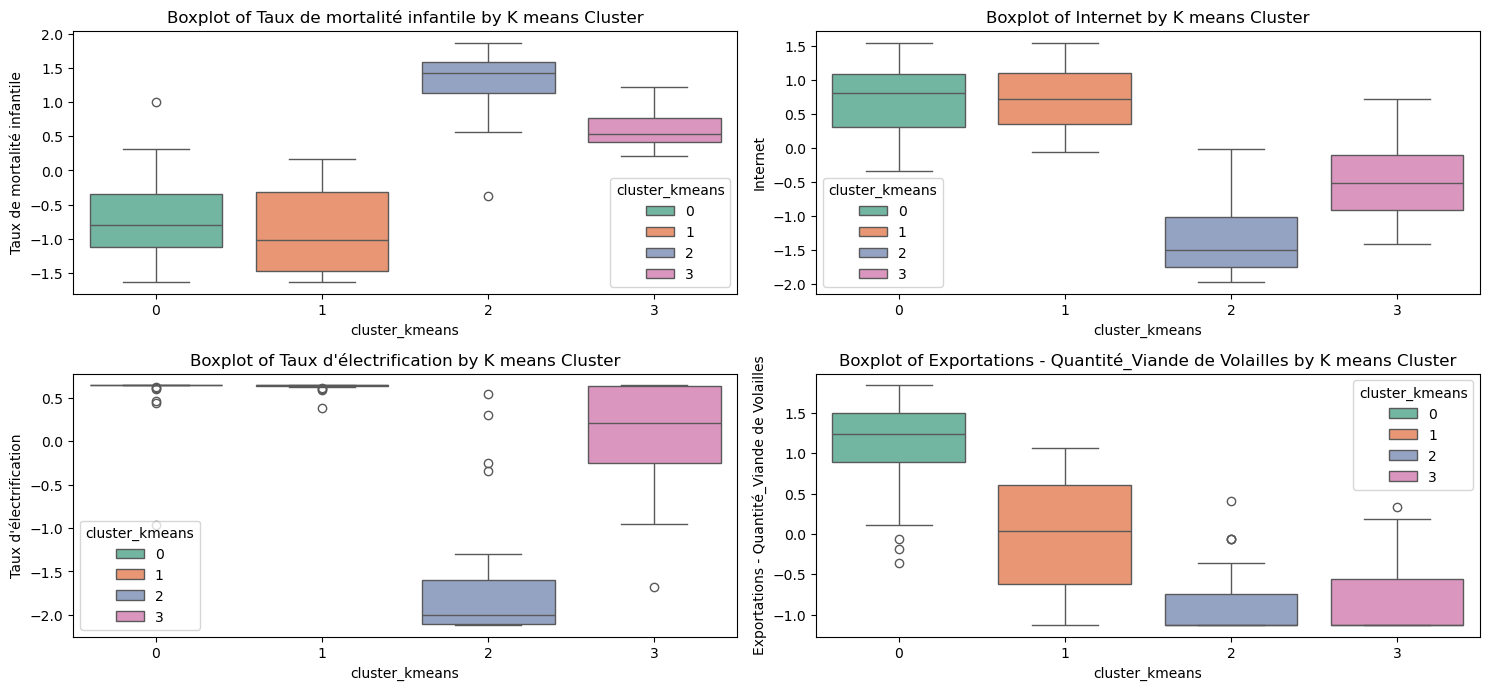

In [81]:
# Récupérer les noms des features
feature_names = [feature for feature, p_value in sorted_p_values]

# Si vous voulez seulement les 10 premières features
top_variables_kmeans = [feature for feature, p_value in sorted_p_values[:4]]

print(top_variables_kmeans)

plt.figure(figsize=(15, 10))

for i, col in enumerate(top_variables_kmeans):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='cluster_kmeans', y=col, data=df_final_scaled, hue='cluster_kmeans' , palette="Set2")
    plt.title(f'Boxplot of {col} by K means Cluster')

plt.tight_layout()
plt.show()

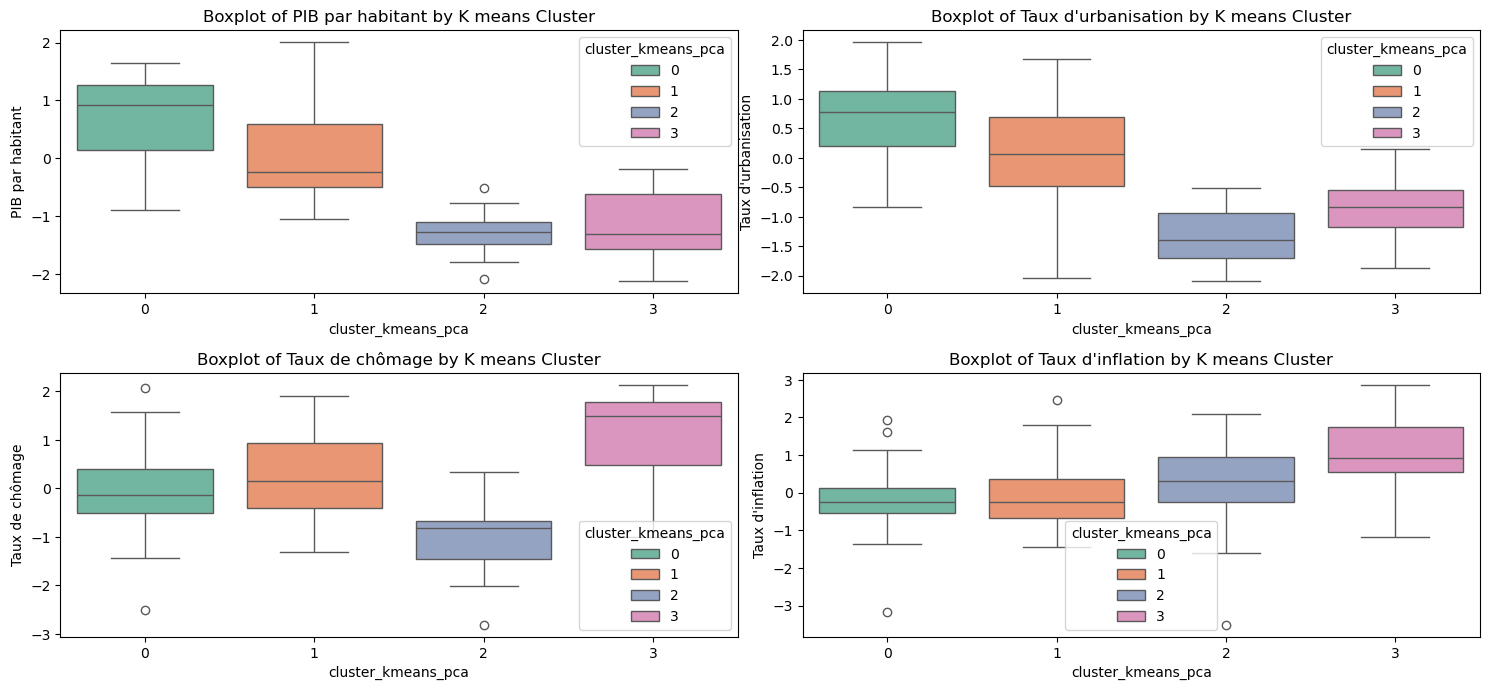

In [98]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(top_pca):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='cluster_kmeans_pca', y=col, data=df_final_scaled, hue='cluster_kmeans_pca' , palette="Set2")
    plt.title(f'Boxplot of {col} by K means Cluster')

plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.1.4 - Pays par cluster</h4>
</div>

In [84]:
 # Grouper les données par 'cluster_kmeans' et lister les 'Area' (pays/régions)
grouped_areas = df_final_scaled.groupby('cluster_kmeans')['Area'].apply(lambda x: ', '.join(x))

# Convertir en DataFrame
area_cluster_df = pd.DataFrame(grouped_areas).reset_index()

# Renommer les colonnes pour plus de clarté
area_cluster_df.columns = ['Cluster K-Means', 'Areas (Pays/Régions)']

# Appliquer du style pour rendre le tableau plus présentable
styled_df = area_cluster_df.style.set_table_styles(
    [{
        'selector': 'thead th',
        'props': [('background-color', '#5DADE2'),
                  ('color', 'white'),
                  ('font-size', '14px'),
                  ('text-align', 'center')]
    },
    {
        'selector': 'tbody td',
        'props': [('background-color', '#EBF5FB'),
                  ('color', 'black'),
                  ('font-size', '12px'),
                  ('text-align', 'left'),
                  ('padding', '10px')]
    }],
    overwrite=False
).set_properties(**{
    'border': '1px solid black',
    'padding': '10px'
})

# Afficher le tableau stylisé
styled_df


,Cluster K-Means,Areas (Pays/Régions)
0,0,"australia, belarus, belgium, brazil, canada, chile, china, colombia, denmark, france, germany, hungary, ireland, israel, italy, japan, kazakhstan, kuwait, malaysia, netherlands, new zealand, poland, portugal, romania, russia, saudi arabia, south africa, spain, thailand, turkey, ukraine, united arab emirates, united kingdom, united states"
1,1,"albania, armenia, austria, bulgaria, costa rica, croatia, cyprus, estonia, finland, georgia, greece, iceland, lebanon, lithuania, luxembourg, malta, norway, oman, serbia, slovenia, sweden, switzerland, uruguay"
2,2,"angola, benin, botswana, cameroon, congo, eswatini, ghana, india, kenya, lesotho, liberia, namibia, niger, nigeria, pakistan, paraguay, senegal, sierra leone, sri lanka, togo, uganda, zambia"
3,3,"algeria, azerbaijan, belize, bolivia, ecuador, el salvador, fiji, gabon, guatemala, guyana, honduras, iraq, jamaica, jordan, morocco, myanmar, nicaragua, panama, philippines, samoa, suriname, trinidad and tobago, tunisia, vietnam"


In [85]:
 # Grouper les données par 'cluster_kmeans' et lister les 'Area' (pays/régions)
grouped_areas = df_final_scaled.groupby('cluster_kmeans_pca')['Area'].apply(lambda x: ', '.join(x))

# Convertir en DataFrame
area_cluster_df = pd.DataFrame(grouped_areas).reset_index()

# Renommer les colonnes pour plus de clarté
area_cluster_df.columns = ['Cluster K-Means_pca', 'Areas (Pays/Régions)']

# Appliquer du style pour rendre le tableau plus présentable
styled_df = area_cluster_df.style.set_table_styles(
    [{
        'selector': 'thead th',
        'props': [('background-color', '#5DADE2'),
                  ('color', 'white'),
                  ('font-size', '14px'),
                  ('text-align', 'center')]
    },
    {
        'selector': 'tbody td',
        'props': [('background-color', '#EBF5FB'),
                  ('color', 'black'),
                  ('font-size', '12px'),
                  ('text-align', 'left'),
                  ('padding', '10px')]
    }],
    overwrite=False
).set_properties(**{
    'border': '1px solid black',
    'padding': '10px'
})

# Afficher le tableau stylisé
styled_df


,Cluster K-Means_pca,Areas (Pays/Régions)
0,0,"australia, belarus, belgium, brazil, canada, chile, china, colombia, denmark, france, germany, hungary, ireland, israel, italy, japan, kazakhstan, kuwait, malaysia, netherlands, new zealand, poland, portugal, romania, russia, saudi arabia, south africa, spain, sweden, thailand, turkey, ukraine, united arab emirates, united kingdom, united states"
1,1,"albania, algeria, armenia, austria, azerbaijan, belize, bolivia, bulgaria, costa rica, croatia, cyprus, ecuador, el salvador, estonia, fiji, finland, gabon, georgia, greece, guatemala, guyana, honduras, iceland, iraq, jamaica, jordan, lebanon, lithuania, luxembourg, malta, morocco, nicaragua, norway, oman, panama, paraguay, samoa, serbia, slovenia, suriname, switzerland, trinidad and tobago, tunisia, uruguay"
2,2,"benin, cameroon, ghana, india, kenya, myanmar, niger, nigeria, pakistan, philippines, senegal, sri lanka, togo, uganda, vietnam"
3,3,"angola, botswana, congo, eswatini, lesotho, liberia, namibia, sierra leone, zambia"


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.2 - CAH</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.2.1 - Analyses des variablies CAH</h4>
</div>

In [86]:
# Grouper les données par les clusters formés par K-Means (ou CAH)
grouped_CAH = df_final_scaled.groupby('cluster_cah')

# Calculer les statistiques descriptives (moyenne, écart-type, etc.) pour chaque cluster
CAH_means = grouped_CAH[numeric_columns].mean()

# Afficher les moyennes de chaque caractéristique pour chaque cluster
print("Moyenne des caractéristiques par 'cluster_cah':")
display(CAH_means)

# Calculer la médiane pour chaque cluster
CAH_median = grouped_CAH[numeric_columns].median()
print("\nMédiane des caractéristiques par 'cluster_cah':")
display(CAH_median)


Moyenne des caractéristiques par 'cluster_cah':


,PIB par habitant,Taux d'urbanisation,Taux de chômage,Taux d'inflation,Part des énergies renouvelables,Taux de mortalité infantile,Taux d'électrification,Production_Viande de Volailles,Importations - Quantité_Viande de Volailles,Variation de stock_Viande de Volailles,...,Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles,Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles,Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles,Exportations - Quantité_Viande de Volailles,Internet,total_population,cluster_cah,pca_cah,cluster_kmeans_pca,cluster_kmeans
cluster_cah,,,,,,,,,,,,,,,,,,,,,
1,-1.180447,-1.027305,-0.129582,0.444599,1.067655,1.264515,-1.499324,-0.524488,-0.402528,-0.294774,...,-1.211650,-1.190812,-1.207093,-0.865525,-1.293681,0.307017,1.0,1.833333,2.333333,2.125000
2,0.557347,0.525807,0.071510,-0.052760,-0.434225,-0.629142,0.554795,0.947867,0.670712,0.371451,...,0.465450,0.488063,0.445940,1.100462,0.571005,0.643787,2.0,2.090909,0.090909,0.242424
3,-0.367623,-0.204352,0.279379,0.058578,-0.086962,0.278831,0.215291,-0.334037,-0.515270,0.014810,...,0.075515,-0.074713,0.170788,-0.581103,-0.273010,-0.497570,3.0,3.703704,1.037037,2.296296
4,1.045479,0.674800,-0.357530,-0.553206,-0.470858,-0.900794,0.624351,-0.509099,0.075762,-0.293851,...,0.614782,0.762667,0.507524,0.007745,1.030341,-0.798893,4.0,2.842105,0.736842,0.947368



Médiane des caractéristiques par 'cluster_cah':


,PIB par habitant,Taux d'urbanisation,Taux de chômage,Taux d'inflation,Part des énergies renouvelables,Taux de mortalité infantile,Taux d'électrification,Production_Viande de Volailles,Importations - Quantité_Viande de Volailles,Variation de stock_Viande de Volailles,...,Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles,Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles,Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles,Exportations - Quantité_Viande de Volailles,Internet,total_population,cluster_cah,pca_cah,cluster_kmeans_pca,cluster_kmeans
cluster_cah,,,,,,,,,,,,,,,,,,,,,
1,-1.253779,-1.029037,-0.655526,0.501652,1.124462,1.382101,-1.983329,-0.622707,-0.348017,-0.095393,...,-1.248013,-1.243241,-1.248064,-1.123594,-1.374972,0.379592,1.0,1.0,2.0,2.0
2,0.428970,0.661488,-0.131976,-0.200883,-0.518893,-0.835981,0.642752,1.059662,0.774591,0.287943,...,0.464186,0.466094,0.410154,1.245087,0.620412,0.685374,2.0,2.0,0.0,0.0
3,-0.456587,-0.211792,0.369781,0.082630,0.017360,0.370324,0.544833,-0.213852,-0.383651,-0.077634,...,0.170266,-0.175987,0.112299,-0.619220,-0.061445,-0.359327,3.0,4.0,1.0,3.0
4,0.949517,0.972250,-0.165494,-0.355682,-0.389276,-1.071596,0.642752,-0.352652,-0.075707,-0.077634,...,0.430947,0.496082,0.328639,-0.062246,1.105301,-0.614498,4.0,3.0,1.0,1.0


<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.2.2 - Correlation</h4>
</div>

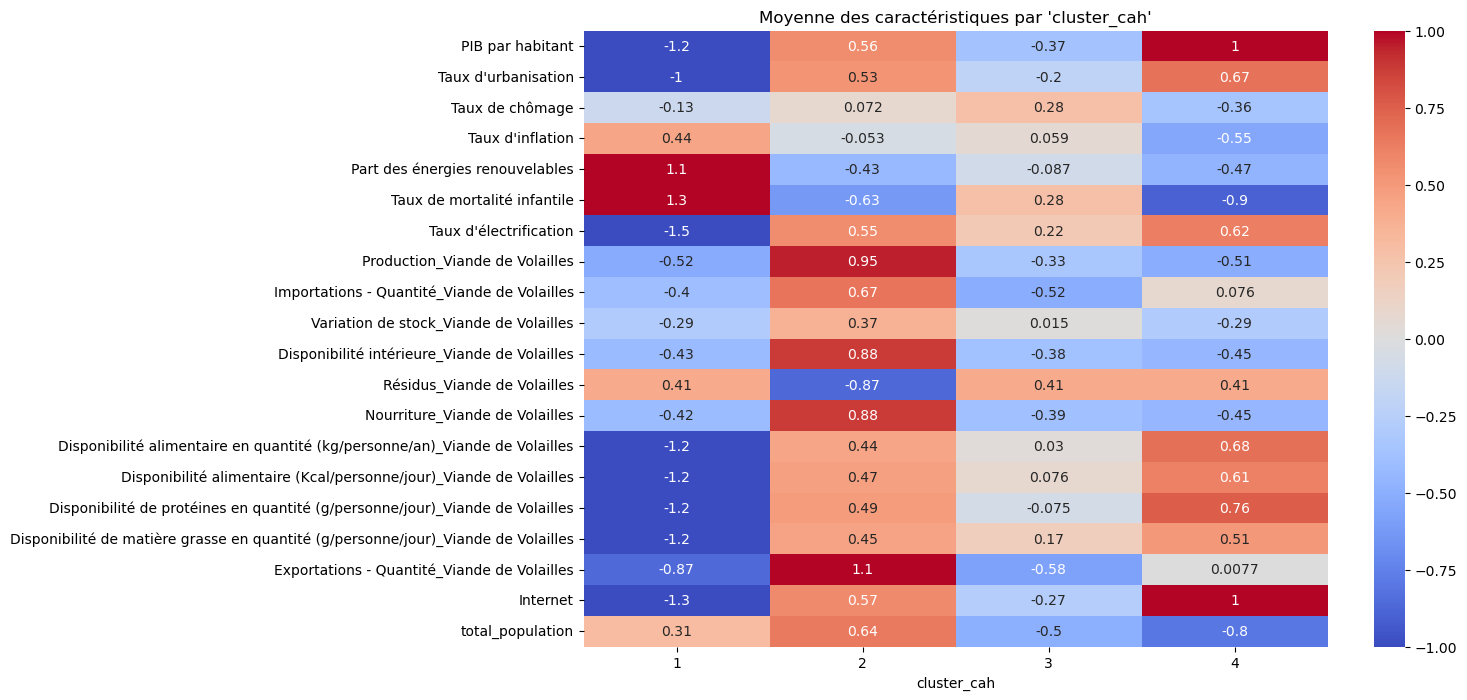

In [87]:
CAH_means_clean = CAH_means.drop(columns=['cluster_cah', 'cluster_kmeans','cluster_kmeans_pca','pca_cah'], errors='ignore')

plt.figure(figsize=(12, 8))
sns.heatmap(CAH_means_clean.T, annot=True, cmap="coolwarm", vmin= -1, vmax=1)
plt.title("Moyenne des caractéristiques par 'cluster_cah'")
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.2.3 - Test kruskal</h4>
</div>

In [88]:
# Test de Kruskal-Wallis pour chaque variable numérique par cluster
kruskal_results = {}
for col in filtered_columns :
    # Groupes de données pour chaque cluster
    groups = [df_final_scaled[df_final_scaled['cluster_cah'] == cluster][col] for cluster in df_final_scaled['cluster_cah'].unique()]
    
    # Effectuer le test Kruskal-Wallis
    stat, p_value = kruskal(*groups)
    kruskal_results[col] = p_value

# Extraire et trier les p-values
sorted_p_values = sorted(kruskal_results.items(), key=lambda item: item[1])

# Afficher les 10 variables avec les p-values les plus faibles
print("Les 10 variables avec les p-values les plus faibles CAH :")
for feature, p_value in sorted_p_values[:10]:
    print(f"{feature}: p-value = {p_value}")


Les 10 variables avec les p-values les plus faibles CAH :
Internet: p-value = 3.267784747785935e-15
PIB par habitant: p-value = 9.239627991303116e-15
Taux d'électrification: p-value = 1.5165360507265815e-14
Taux de mortalité infantile: p-value = 1.9652864091848885e-14
Exportations - Quantité_Viande de Volailles: p-value = 6.837511091672585e-14
Disponibilité de protéines en quantité (g/personne/jour)_Viande de Volailles: p-value = 4.849030207984385e-11
Production_Viande de Volailles: p-value = 2.1693827832126178e-10
Disponibilité alimentaire (Kcal/personne/jour)_Viande de Volailles: p-value = 6.880017491351249e-10
Disponibilité alimentaire en quantité (kg/personne/an)_Viande de Volailles: p-value = 7.285297060480855e-10
Disponibilité de matière grasse en quantité (g/personne/jour)_Viande de Volailles: p-value = 1.5363134611267765e-09


In [89]:
# Récupérer les noms des features
feature_names = [feature for feature, p_value in sorted_p_values]

# Si vous voulez seulement les 10 premières features
top_variables_cah = [feature for feature, p_value in sorted_p_values[:4]]

print(top_variables_cah)



['Internet', 'PIB par habitant', "Taux d'électrification", 'Taux de mortalité infantile']


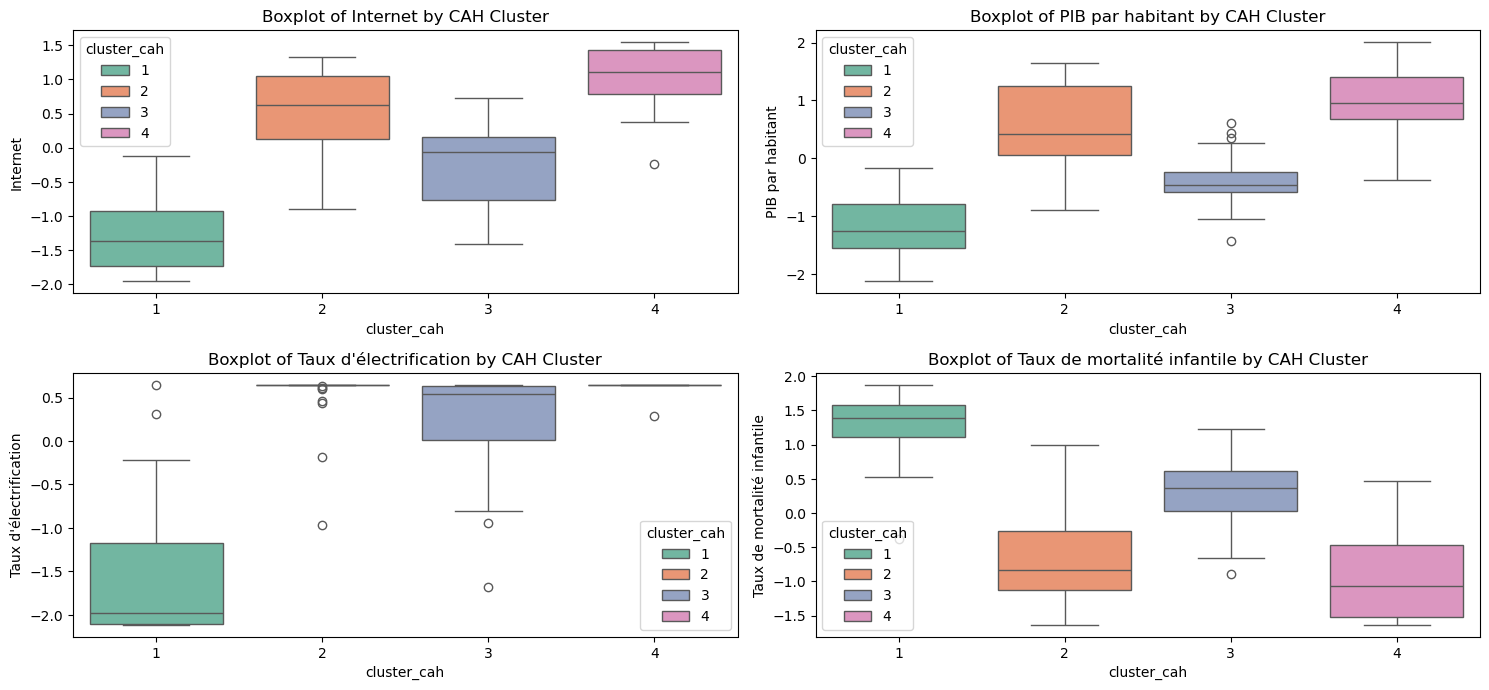

In [90]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(top_variables_cah):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='cluster_cah', y=col, data=df_final_scaled, hue = 'cluster_cah', palette="Set2")
    plt.title(f'Boxplot of {col} by CAH Cluster')

plt.tight_layout()
plt.show()

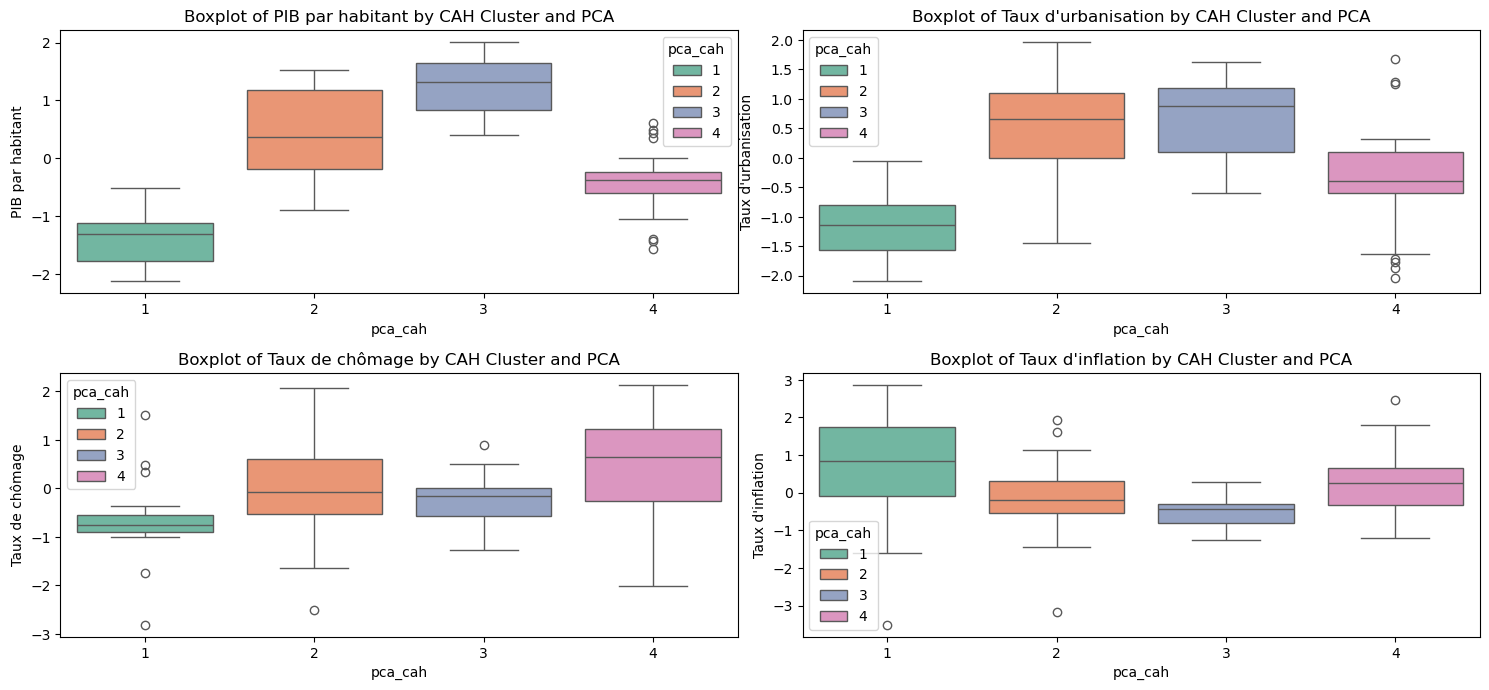

In [99]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(top_pca):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='pca_cah', y=col, data=df_final_scaled, hue = 'pca_cah', palette="Set2")
    plt.title(f'Boxplot of {col} by CAH Cluster and PCA')

plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.2.4 - Pays par cluster</h4>
</div>

In [93]:
# Grouper les données par 'cluster_cah' et lister les 'Area' (pays/régions)
grouped_areas = df_final_scaled.groupby('cluster_cah')['Area'].apply(lambda x: ', '.join(x))

# Convertir en DataFrame
area_cluster_df = pd.DataFrame(grouped_areas).reset_index()

# Renommer les colonnes pour plus de clarté
area_cluster_df.columns = ['Cluster cah', 'Areas (Pays/Régions)']

# Appliquer du style pour rendre le tableau plus présentable
styled_df = area_cluster_df.style.set_table_styles(
    [{
        'selector': 'thead th',
        'props': [('background-color', '#5DADE2'),
                  ('color', 'white'),
                  ('font-size', '14px'),
                  ('text-align', 'center')]
    },
    {
        'selector': 'tbody td',
        'props': [('background-color', '#EBF5FB'),
                  ('color', 'black'),
                  ('font-size', '12px'),
                  ('text-align', 'left'),
                  ('padding', '10px')]
    }],
    overwrite=False
).set_properties(**{
    'border': '1px solid black',
    'padding': '10px'
})

# Afficher le tableau stylisé
styled_df


,Cluster cah,Areas (Pays/Régions)
0,1,"angola, benin, botswana, cameroon, congo, eswatini, gabon, ghana, india, kenya, lesotho, liberia, namibia, niger, nigeria, pakistan, philippines, senegal, sierra leone, sri lanka, togo, uganda, vietnam, zambia"
1,2,"australia, belarus, belgium, brazil, canada, chile, china, colombia, france, germany, greece, guatemala, hungary, ireland, italy, japan, jordan, kazakhstan, malaysia, netherlands, new zealand, poland, portugal, romania, russia, south africa, spain, sweden, thailand, turkey, ukraine, united kingdom, united states"
2,3,"albania, algeria, armenia, azerbaijan, belize, bolivia, bulgaria, costa rica, croatia, ecuador, el salvador, fiji, georgia, guyana, honduras, iraq, lebanon, morocco, myanmar, nicaragua, panama, paraguay, samoa, serbia, suriname, tunisia, uruguay"
3,4,"austria, cyprus, denmark, estonia, finland, iceland, israel, jamaica, kuwait, lithuania, luxembourg, malta, norway, oman, saudi arabia, slovenia, switzerland, trinidad and tobago, united arab emirates"


In [94]:
# Grouper les données par 'cluster_cah' et lister les 'Area' (pays/régions)
grouped_areas = df_final_scaled.groupby('pca_cah')['Area'].apply(lambda x: ', '.join(x))

# Convertir en DataFrame
area_cluster_df = pd.DataFrame(grouped_areas).reset_index()

# Renommer les colonnes pour plus de clarté
area_cluster_df.columns = ['Cluster cah - PCA', 'Areas (Pays/Régions)']

# Appliquer du style pour rendre le tableau plus présentable
styled_df = area_cluster_df.style.set_table_styles(
    [{
        'selector': 'thead th',
        'props': [('background-color', '#5DADE2'),
                  ('color', 'white'),
                  ('font-size', '14px'),
                  ('text-align', 'center')]
    },
    {
        'selector': 'tbody td',
        'props': [('background-color', '#EBF5FB'),
                  ('color', 'black'),
                  ('font-size', '12px'),
                  ('text-align', 'left'),
                  ('padding', '10px')]
    }],
    overwrite=False
).set_properties(**{
    'border': '1px solid black',
    'padding': '10px'
})

# Afficher le tableau stylisé
styled_df


,Cluster cah - PCA,Areas (Pays/Régions)
0,1,"angola, benin, cameroon, ghana, india, kenya, liberia, niger, nigeria, pakistan, senegal, sierra leone, sri lanka, togo, uganda, zambia"
1,2,"australia, belarus, belgium, brazil, bulgaria, canada, chile, china, colombia, costa rica, france, germany, greece, guatemala, iraq, israel, italy, japan, jordan, kazakhstan, kuwait, lithuania, malaysia, morocco, netherlands, philippines, poland, portugal, romania, russia, saudi arabia, south africa, spain, sweden, thailand, turkey, ukraine, united arab emirates, united kingdom, united states, vietnam"
2,3,"austria, cyprus, denmark, estonia, finland, hungary, iceland, ireland, luxembourg, malta, new zealand, norway, oman, slovenia, switzerland"
3,4,"albania, algeria, armenia, azerbaijan, belize, bolivia, botswana, congo, croatia, ecuador, el salvador, eswatini, fiji, gabon, georgia, guyana, honduras, jamaica, lebanon, lesotho, myanmar, namibia, nicaragua, panama, paraguay, samoa, serbia, suriname, trinidad and tobago, tunisia, uruguay"


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">6 - Conclusion et recommandations</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:; ">6.1 - Analyse des Clusters pour l'Exportation de Poulets Biologiques</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color:;">6.1.1 - Clusters K-means</h4>
</div>


##### Cluster 0 : Pays à faible consommation de volaille et infrastructures limitées
- **Exemples de pays** : Algeria, Angola, Benin, Botswana, Cameroon, Congo.
- **Caractéristiques** : Faible consommation et production de volaille, infrastructures limitées (électrification, Internet). Ces pays sont encore en phase de développement, avec une forte dépendance aux importations alimentaires.

##### Cluster 1 : Pays développés avec une forte consommation de volaille
- **Exemples de pays** : Australia, Brazil, Canada, United States, China, Germany.
- **Caractéristiques** : Grande production et consommation de volaille, infrastructures bien développées. Ces pays sont des leaders mondiaux dans la production et consommation de produits de volaille, ce qui en fait des cibles pour des produits biologiques.

##### Cluster 2 : Pays émergents avec une consommation modérée
- **Exemples de pays** : Albania, Armenia, Azerbaijan, Belize, Costa Rica.
- **Caractéristiques** : PIB modéré, infrastructures en développement. Ces pays montrent un potentiel de croissance à moyen terme avec une augmentation de la classe moyenne et de la demande pour des produits de qualité.

##### Cluster 3 : Pays développés avec une consommation stable
- **Exemples de pays** : Austria, Belgium, Finland, France, Italy, Japan.
- **Caractéristiques** : Production de volaille stable, infrastructures avancées. Ces pays sont des marchés matures avec une demande constante de produits alimentaires de qualité, incluant les produits biologiques.


<div style="border: 1px solid RGB(51,165,182);" >
<h4 style="margin: auto; padding: 20px; color:;">6.1.2 - Clusters CAH</h4>
</div>


##### Cluster 1 : Pays avec infrastructures limitées et forte mortalité infantile
- **Exemples de pays** : Angola, Benin, Botswana, Congo, Ghana, Kenya.
- **Caractéristiques** : Faibles infrastructures, mortalité infantile élevée. Ces pays ne sont pas des cibles immédiates, mais ils pourraient présenter un potentiel à long terme à mesure que leurs infrastructures se développent.

##### Cluster 2 : Pays industrialisés avec forte consommation de volaille
- **Exemples de pays** : Australia, Brazil, Canada, United States, France, Germany.
- **Caractéristiques** : Grande production et consommation de volaille, infrastructures bien développées. Ces pays sont les meilleurs candidats pour l'exportation de produits de volaille biologiques.

##### Cluster 3 : Pays en développement rapide
- **Exemples de pays** : Albania, Algeria, India, Myanmar, Pakistan, Sri Lanka.
- **Caractéristiques** : Infrastructures en développement, consommation croissante de volaille. Ces pays sont des cibles potentielles à moyen terme, avec une croissance rapide de la demande.

##### Cluster 4 : Pays riches avec consommation modérée
- **Exemples de pays** : Austria, Belgium, Finland, Iceland, Kuwait, Luxembourg.
- **Caractéristiques** : PIB élevé, consommation modérée de volaille. Ces pays peuvent offrir un marché plus niche, mais stable pour les produits de haute qualité comme la volaille biologique.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:;">6.2 - Conclusion globale</h3>
</div>


L'analyse des clusters montre une nette distinction entre les pays développés à forte consommation de volaille, les pays émergents à potentiel de croissance, et les pays avec des infrastructures limitées. Les pays développés et ceux en développement rapide représentent les meilleurs marchés pour l'exportation de poulets biologiques à court et moyen terme. Les pays avec des infrastructures faibles pourraient offrir des opportunités à long terme, à mesure que leurs économies se développent.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color:;">6.3 - Recommandations stratégiques</h3>
</div>


- **Priorité immédiate (Cluster 1 K-means et CAH)** : 
  - Ciblez les marchés déjà matures comme les **États-Unis, le Brésil, la Chine**, où la demande pour des produits biologiques est forte et les infrastructures sont en place.

- **Opportunités à moyen terme (Cluster 3 K-means et CAH)** :
  - Surveillez les pays émergents comme **l'Inde, le Pakistan, et l'Algérie**, où la demande pour des produits de volaille augmente à mesure que les infrastructures et les classes moyennes se développent.

- **Opportunités à long terme (Cluster 1 et Cluster 2 CAH)** :
  - Gardez un œil sur les pays avec des infrastructures limitées comme **le Ghana, le Kenya, et le Nigéria**, qui, à long terme, pourraient devenir des cibles pour des produits biologiques au fur et à mesure de leur développement économique.
